In [0]:
from fastai import *
from fastai.vision import *

In [0]:
file='/grizz.txt'
folder = 'grizz'
path= Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(file, dest, max_pics=200)


In [0]:
file='/teddies.txt'
folder = 'teddies'
path= Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(file, dest, max_pics=200)


In [0]:
file='/black.txt'
folder = 'black'
path= Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(file, dest, max_pics=200)


In [0]:
classes = ['teddys','grizzly','black']


In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
path='/content/data/bears'
c=0
for i in os.listdir(path):
  for j in os.listdir(path+'/'+i):
    try:
      img=mpimg.imread(path+'/'+i+'/'+j)
    except:
      try:
        os.remove(path+'/'+i+'/'+j)
        c+=1
      except:
        pass
print(c)
    

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 14001641472 bytes but only got 0. Skipping tag 256
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 7. 
  warnings.warn(str(msg))


19


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

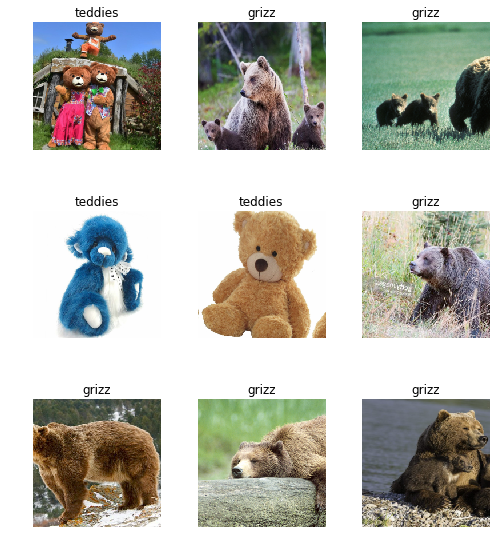

In [67]:
data.show_batch(rows=3, figsize=(7,8))


In [68]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['black', 'grizz', 'teddies'], 3, 448, 111)

In [0]:
#train model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [70]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.980208,0.160176,0.036036,00:26
1,0.549008,0.114380,0.027027,00:27
2,0.387886,0.116069,0.027027,00:28
3,0.298281,0.116342,0.027027,00:28


In [0]:
learn.save('stage-1')


In [72]:
learn.unfreeze()
learn.lr_find()

    

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


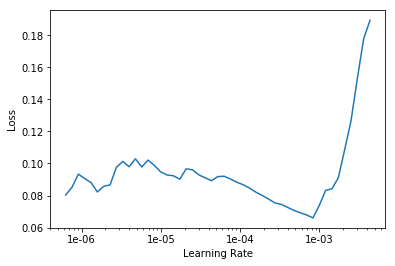

In [76]:
learn.recorder.plot() 


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


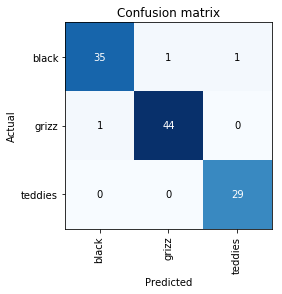

In [78]:
interp.plot_confusion_matrix()


NameError: ignored